In [2]:
! pip install -q tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [5]:
POS_PATH = os.path.join('data2', 'positive')
NEG_PATH = os.path.join('data2', 'negative')
ANC_PATH = os.path.join('data2', 'anchor')

In [38]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH) 

In [39]:
!tar -xf lfw.tgz

In [40]:
import os

In [ ]:
import os

source_dir = 'lfw'
destination_dir = 'data2/negative'

for directory in os.listdir(source_dir):
    dir_path = os.path.join(source_dir, directory)
    if os.path.isdir(dir_path):  # Ensure it's a directory
        for file in os.listdir(dir_path):
            EX_PATH = os.path.join(dir_path, file)
            NEG_PATH = os.path.join(destination_dir, file)
            
            # Ensure destination directory exists
            os.makedirs(os.path.dirname(NEG_PATH), exist_ok=True)

            # Move the file
            try:
                os.replace(EX_PATH, NEG_PATH)
                print(f"Moved: {EX_PATH} -> {NEG_PATH}")
            except FileNotFoundError as e:
                print(f"Error moving {EX_PATH} to {NEG_PATH}: {e}")


In [ ]:
os.listdir('lfw')

In [7]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',directory)):
        #  print(file)
         print(os.path.join('lfw',directory,file))
         print(os.path.join(NEG_PATH,file))

         


In [8]:
# Establish a connection to the webcam
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame=frame[120:120+250,200:200+250,:]
    # show image back to screen
    cv2.imshow('Image Collection', frame)

    #Breaking gracefully
    if cv2.waitKey(1)& 0XFF == ord('q'):
        break
#Release the camera and close the window
cap.release()
cv2.destroyAllWindows()

In [56]:
frame

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [239, 243, 244],
        [219, 223, 225],
        [207, 211, 213]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [240, 245, 243],
        [222, 226, 226],
        [209, 213, 213]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [243, 248, 245],
        [227, 232, 229],
        [212, 217, 215]],

       ...,

       [[202, 202, 202],
        [200, 202, 202],
        [199, 203, 203],
        ...,
        [182, 193, 200],
        [183, 193, 200],
        [184, 194, 201]],

       [[197, 201, 201],
        [198, 203, 202],
        [196, 203, 202],
        ...,
        [180, 194, 200],
        [179, 194, 200],
        [179, 194, 200]],

       [[193, 201, 200],
        [193, 202, 202],
        [192, 202, 203],
        ...,
        [179, 195, 201],
        [178, 195, 201],
        [179, 196, 202]]

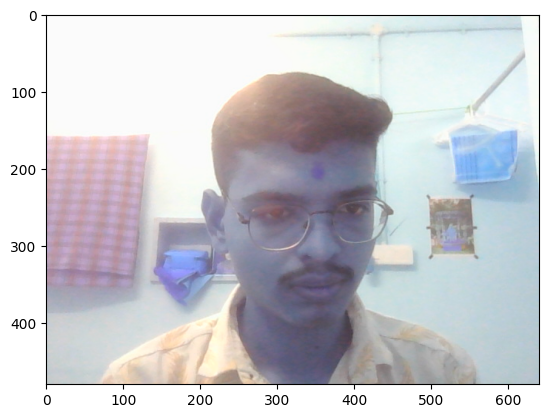

In [57]:
plt.imshow(frame)

In [58]:
frame.shape

(480, 640, 3)

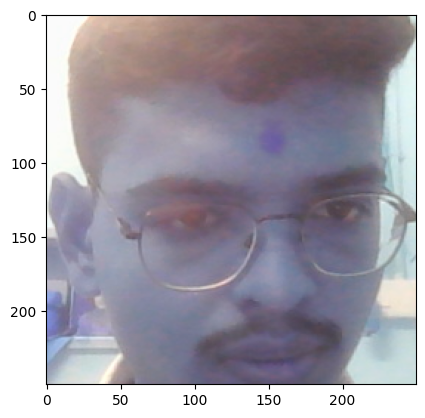

In [65]:
plt.imshow(frame[120:250+120,200:250+200,:])

In [9]:
# import uuid library to generate unique image names
import uuid

In [10]:
uuid.uuid1()

UUID('c595bedd-4f13-11ef-83e4-aca9eea5275c')

In [11]:
import cv2

In [14]:
 #Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [16]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [17]:
dir_test = anchor.as_numpy_iterator()

In [18]:
print(dir_test.next())

b'data2\\anchor\\0b245229-4f14-11ef-81b5-aca9eea5275c.jpg'


In [19]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [21]:
img = preprocess('data2\\anchor\\0a13daea-4f14-11ef-a269-aca9eea5275c.jpg')

In [22]:
img.numpy().max() 

0.9769608

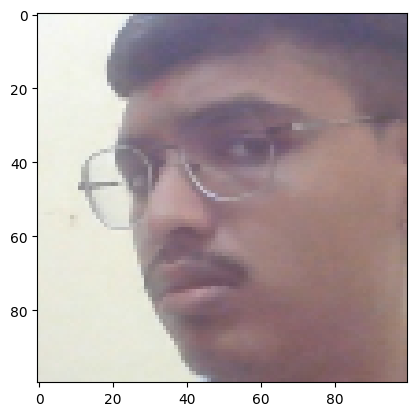

In [23]:
plt.imshow(img)

In [28]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [29]:
samples = data.as_numpy_iterator()

In [31]:
example = samples.next()

In [33]:
example

(b'data2\\anchor\\2d34a4d0-4f14-11ef-aa64-aca9eea5275c.jpg',
 b'data2\\positive\\bd83f4bd-4f14-11ef-8cf9-aca9eea5275c.jpg',
 1.0)

In [35]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [37]:
res = preprocess_twin(*example)

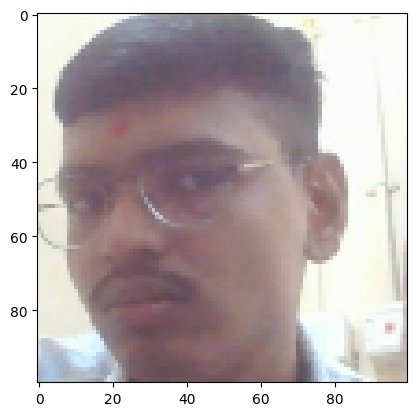

In [38]:
plt.imshow(res[1])

In [39]:
res[2]

1.0

In [40]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [41]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [42]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [43]:
inp = Input(shape=(100,100,3), name='input_image')

In [44]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [45]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [46]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [47]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [48]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [49]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [50]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [51]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [52]:
embedding = make_embedding()

In [53]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

In [54]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [55]:

l1 = L1Dist()

In [58]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [61]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [62]:
siamese_layer = L1Dist()

In [63]:
distances = siamese_layer(inp_embedding, val_embedding)

In [65]:
classifier = Dense(1, activation='sigmoid')(distances)

In [66]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [67]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [68]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [70]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [78]:
siamese_model = make_siamese_model()

In [79]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [80]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [81]:
opt = tf.keras.optimizers.Adam(1e-4) 

In [82]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [83]:
test_batch = train_data.as_numpy_iterator()

In [84]:
batch_1 = test_batch.next()

In [85]:

X = batch_1[:2]

In [86]:
y = batch_1[2]

In [87]:
y

array([0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.],
      dtype=float32)

In [88]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [89]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [90]:
EPOCHS = 50

In [91]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 55s 2s/step

 Epoch 2/50
27/27 [==============================] - 46s 2s/step

 Epoch 3/50
27/27 [==============================] - 47s 2s/step

 Epoch 4/50
27/27 [==============================] - 49s 2s/step

 Epoch 5/50
27/27 [==============================] - 58s 2s/step

 Epoch 6/50
27/27 [==============================] - 53s 2s/step

 Epoch 7/50
27/27 [==============================] - 50s 2s/step

 Epoch 8/50
27/27 [==============================] - 53s 2s/step

 Epoch 9/50
27/27 [==============================] - 53s 2s/step

 Epoch 10/50
27/27 [==============================] - 52s 2s/step

 Epoch 11/50
27/27 [==============================] - 50s 2s/step

 Epoch 12/50
27/27 [==============================] - 49s 2s/step

 Epoch 13/50
27/27 [==============================

In [92]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [93]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [94]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [96]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 1s 995ms/step


In [97]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]

In [98]:
y_true

array([0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
      dtype=float32)

In [99]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [100]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [101]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 184ms/step
1.0 1.0


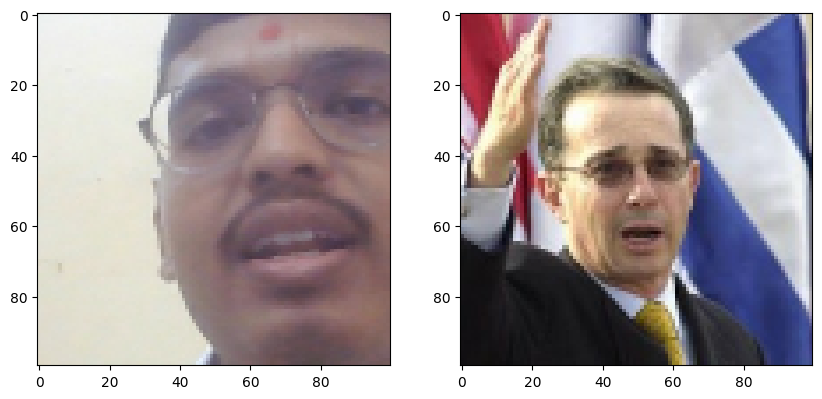

In [102]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [103]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

C:\Users\Rutvik Rathva\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
L1Dist


__main__.L1Dist

In [105]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})


In [106]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 1s 539ms/step


array([[7.1460107e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999994e-01]], dtype=float32)

In [107]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [136]:
def face_detection(img1, img2):
  preprocessed_image1 = preprocess(img1)
  preprocessed_image2 = preprocess(img2)
  plt.figure(figsize=(10,8))
  plt.subplot(1,2,1)
  plt.imshow(preprocessed_image1)
  plt.subplot(1,2,2)
  plt.imshow(preprocessed_image2)
  plt.show()
  result = siamese_model.predict(list(np.expand_dims([preprocessed_image1, preprocessed_image2], axis=1)))
  print(result)
  if result > 0.5:
    print("Matched")
  else:
    print("Not Matched")

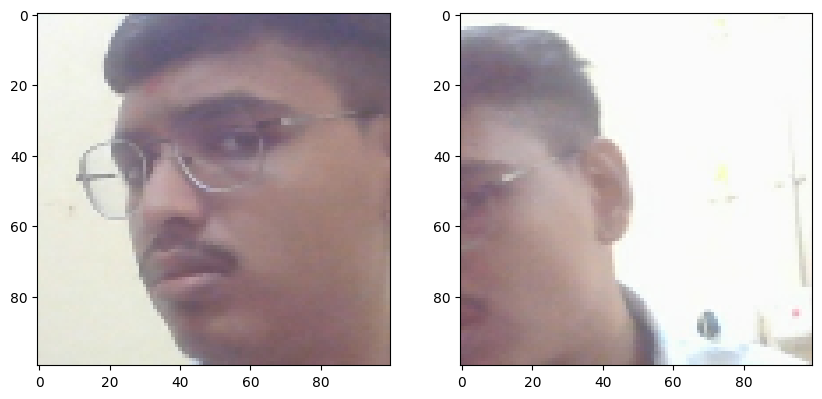

1/1 [==============================] - 0s 86ms/step
[[0.9999997]]
Matched


In [145]:
face_detection('data2//anchor//0a13daea-4f14-11ef-a269-aca9eea5275c.jpg', 'data2//positive//b1e797af-4f14-11ef-9561-aca9eea5275c.jpg')
